In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.sparse as sc
import scipy.sparse.linalg as la

%matplotlib inline

In [2]:
def criaMat(n): 
    a = np.ones((n,))
    M = np.diag(-2 * a) + np.diag(a[1:], -1) + np.diag(a[:-1], 1)
    return M

In [3]:
n = 4
A = np.random.randint(0, 50, (n, n))
B = criaMat(n)

In [4]:
print(A)

#Norma linha
print('\nSoma das linhas:', np.sum(np.abs(A), axis = 1), '\n', np.linalg.norm(A, np.inf))

#Norma coluna
print('\nSoma das colunas:', np.sum(np.abs(A), axis = 0), '\n', np.linalg.norm(A, 1))

#Norma 2
print('\nNorma 2:', np.linalg.norm(A, 2))

#Norma Frobenius
print('\nNorma Frobenius', np.linalg.norm(A))
print(np.sqrt(np.sum(np.power(A, 2))))

#Polinômio característico de uma matriz (nxn) -> grau n
aval, avet = np.linalg.eig(A)
print('\nAutovalores:', aval)
print('\nAutovetores:\n', avet)

#Existe uma relação entre a norma 2 e o maior altovalor em módulo

[[42 40  5  8]
 [35 14 33 43]
 [10 27 17 20]
 [14 16 13 33]]

Soma das linhas: [ 95 125  74  76] 
 125.0

Soma das colunas: [101  97  68 104] 
 104.0

Norma 2: 95.82697985882616

Norma Frobenius 105.07140429250958
105.07140429250958

Autovalores: [ 93.74295304 -23.76682954  26.33470009   9.68917641]

Autovetores:
 [[-0.57185925 -0.45016543 -0.79785718  0.26785535]
 [-0.61560381  0.79492985  0.18474641 -0.2005046 ]
 [-0.38942828 -0.40624823  0.4479851  -0.83272913]
 [-0.37729904 -0.01999996  0.35861127  0.44115032]]


# Instabilidade
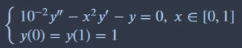

In [5]:
def PVF(l, alpha, beta, p, q, f, h): #caso geral (muda a construção da mariz)
    n = int((l/h) - 1)
    #Discretizando o intervalo
    x = np.linspace(0, l, n+2)
    xi = x[1:-1]
    h2 = h**2
    
    #Cria matriz
    a = -2 * np.ones((n,)) + h2 * q(xi) 
    b = np.ones((n,)) - h/2 * p(xi)
    c = np.ones((n,)) + h/2 * p(xi)
    
    A = np.diag(a) + np.diag(b[1:], -1) + np.diag(c[:-1], 1)
    
    F = h2 * np.ones((n,)) * f(xi)
    F[0] -= alpha * b[0]
    F[-1] -= beta * c[-1]
    y = np.zeros((n+2,))
    y[0] = alpha
    y[-1] = beta
    
    #Montando e resolvendo o sistema linear
    y[1:-1] = np.linalg.solve(A, F)
    return y, x

In [6]:
#y''(x) - 100x²y'(x) - 100y(x) = 0, 0 < x < 1
#y(0) = y(1) = 1
#p(x) = - 100x²
#q(x) = - 100 <= 0
#f(x) = 0
#max _(0<=x<=1) |p(x)| = max _(0<=x<=1) 100x² = 100 => h < 2/100
#Dessa forma, o método possui um comportamento mais estável com n=120 pois h=1/121 < 2/100, algo que não acontece para os outros dois valores de n (10 e 20)

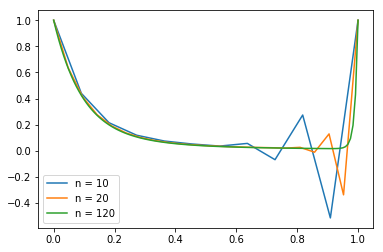

In [7]:
l = 1
alpha = 1
beta = 1
p = lambda x: - 100*(x**2)
q = lambda x: - 100
f = lambda x: 0

#Convertendo n para h (a função usa h como parâmetro)
y, x = PVF(l, alpha, beta, p, q, f, (l)/(10+1))
plt.plot(x, y, label = 'n = 10')

y, x = PVF(l, alpha, beta, p, q, f, (l)/(20+1))
plt.plot(x, y, label = 'n = 20')

y, x = PVF(l, alpha, beta, p, q, f, (l)/(120+1))
plt.plot(x, y, label = 'n = 120')
plt.legend()
